In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [5]:
ruta_gn = 'Datos_categorizados/df_general_trn.csv'
ruta_lg = 'Datos_categorizados/df_general_trn_light.csv'

df_general = pd.read_csv(ruta_gn)
df_light = pd.read_csv(ruta_lg)

df_general.drop(columns="Unnamed: 0", inplace=True)
df_light.drop(columns="Unnamed: 0", inplace=True)

In [6]:
def orden(df, columna,ordena):

   #ordena = ['muy denso','denso', 'fluid','muy fluid', 'despejado']

    df_res = pd.DataFrame()

    for i in ordena:

        df_res = df_res.append(df[df[columna] == i], ignore_index=True)
    
    return df_res

In [7]:
df_general.columns

Index(['<Ple/Buit>', '<Tipus Operació>', '<Lloc d'entrada port>',
       '<Minuts trànsit>', '<num camiones>', '<Hist. Minuts trànsit>',
       '<Hist. codeco sortida>', 'Mes'],
      dtype='object')

# Eliminación de valores df_general en situaciones ilógicas

In [8]:
previo = len(df_general)

In [9]:
indices = df_general[(df_general["<Minuts trànsit>"] == "despejado") & (df_general['<Hist. codeco sortida>'] == "muy denso")].index

df_no_cod = df_general.drop(indices)

In [10]:
indices = df_general[(df_general["<Minuts trànsit>"] == "muy denso") & (df_general['<Hist. codeco sortida>'] == "despejado")].index

df_no_cod.drop(indices, inplace=True)

In [11]:
indices = df_general[(df_general["<Minuts trànsit>"] == "despejado") & (df_general['<Hist. Minuts trànsit>'] == "muy denso")].index

df_no_min = df_general.drop(indices)

In [12]:
indices = df_general[(df_general["<Minuts trànsit>"] == "muy denso") & (df_general['<Hist. Minuts trànsit>'] == "despejado")].index

df_no_min.drop(indices, inplace=True)

In [13]:
print("de ",previo, "se han conservado ", len(df_no_min),"valores")

de  1396147 se han conservado  1379787 valores


In [14]:
print("de ",previo, "se han conservado ", len(df_no_cod),"valores")

de  1396147 se han conservado  1311144 valores


In [15]:
indice = df_general[(df_general["<Minuts trànsit>"] == "muy denso") & (df_general['<Hist. Minuts trànsit>'] == "despejado")
           & (df_general["<Minuts trànsit>"] == "muy denso") & (df_general['<Hist. codeco sortida>'] == "despejado")].index


df_final = df_general.drop(indices)

In [16]:
indice = df_general[(df_general["<Minuts trànsit>"] == "despejado") & (df_general['<Hist. Minuts trànsit>'] == "muy denso")
           & (df_general["<Minuts trànsit>"] == "despejado") & (df_general['<Hist. codeco sortida>'] == "muy denso")].index


df_final = df_general.drop(indices)

In [17]:
print("de ",previo, "se han conservado ", len(df_final),"valores")

de  1396147 se han conservado  1394376 valores


Eliminar ambos valores

# Eliminación de valores df_light

In [18]:
previo = len(df_light)

In [19]:
indices = df_light[(df_light["<Minuts trànsit>"] == "despejado") & (df_light['<Hist. codeco sortida>'] == "muy denso")].index

df_no_cod = df_light.drop(indices)

In [20]:
indices = df_light[(df_light["<Minuts trànsit>"] == "muy denso") & (df_light['<Hist. codeco sortida>'] == "despejado")].index

df_no_cod.drop(indices, inplace=True)

In [21]:
indices = df_light[(df_light["<Minuts trànsit>"] == "despejado") & (df_light['<Hist. Minuts trànsit>'] == "muy denso")].index

df_no_min = df_light.drop(indices)

In [22]:
indices = df_light[(df_light["<Minuts trànsit>"] == "muy denso") & (df_light['<Hist. Minuts trànsit>'] == "despejado")].index

df_no_min.drop(indices, inplace=True)

In [23]:
print("de ",previo, "se han conservado ", len(df_no_min),"valores")

de  1328372 se han conservado  1312733 valores


In [24]:
print("de ",previo, "se han conservado ", len(df_no_cod),"valores")

de  1328372 se han conservado  1242831 valores


In [25]:
indice = df_light[(df_light["<Minuts trànsit>"] == "muy denso") & (df_light['<Hist. Minuts trànsit>'] == "despejado")
           & (df_light["<Minuts trànsit>"] == "muy denso") & (df_light['<Hist. codeco sortida>'] == "despejado")].index


df_final = df_light.drop(indices)

In [26]:
indice = df_light[(df_light["<Minuts trànsit>"] == "despejado") & (df_light['<Hist. Minuts trànsit>'] == "muy denso")
           & (df_light["<Minuts trànsit>"] == "despejado") & (df_light['<Hist. codeco sortida>'] == "muy denso")].index


df_final = df_general.drop(indices)

In [27]:
print("de ",previo, "se han conservado ", len(df_final),"valores")

de  1328372 se han conservado  1394443 valores


# Construcción de general menor

In [28]:
df_general_menor = df_general.copy()

In [29]:
len(df_general)

1396147

In [30]:
indices = df_general_menor[(df_general_menor["<Minuts trànsit>"] == "despejado") & (df_general_menor['<Hist. codeco sortida>'] == "muy denso")].index

df_general_menor.drop(indices, inplace = True)

In [31]:
len(df_general_menor)

1353176

In [32]:
indices = df_general_menor[(df_general_menor["<Minuts trànsit>"] == "muy denso") & (df_general_menor['<Hist. codeco sortida>'] == "despejado")].index

df_general_menor.drop(indices, inplace = True)

In [33]:
len(df_general_menor)

1311144

In [34]:
indices = df_general_menor[(df_general_menor["<Minuts trànsit>"] == "despejado") & (df_general_menor['<Hist. Minuts trànsit>'] == "muy denso")].index

df_general_menor.drop(indices, inplace = True)

In [35]:
len(df_general_menor)

1299914

In [36]:
indices = df_general_menor[(df_general_menor["<Minuts trànsit>"] == "muy denso") & (df_general_menor['<Hist. Minuts trànsit>'] == "despejado")].index

df_general_menor.drop(indices, inplace = True)

In [37]:
len(df_general_menor)

1298571

In [38]:
df_general_menor.drop("<Tipus Operació>",axis=1,inplace=True)

In [39]:
df_general_menor.drop("<Ple/Buit>",axis=1,inplace=True)

# Construcción de light menor

In [40]:
df_light_menor = df_light.copy()

In [41]:
len(df_light)

1328372

In [42]:
indices = df_light_menor[(df_light_menor["<Minuts trànsit>"] == "despejado") & (df_light_menor['<Hist. codeco sortida>'] == "muy denso")].index

df_light_menor.drop(indices, inplace = True)

In [43]:
len(df_light)

1328372

In [44]:
indices = df_light_menor[(df_light_menor["<Minuts trànsit>"] == "muy denso") & (df_light_menor['<Hist. codeco sortida>'] == "despejado")].index

df_light_menor.drop(indices, inplace = True)

In [45]:
len(df_light_menor)

1242831

In [46]:
indices = df_light_menor[(df_light_menor["<Minuts trànsit>"] == "despejado") & (df_light_menor['<Hist. Minuts trànsit>'] == "muy denso")].index

df_light_menor.drop(indices, inplace = True)

In [47]:
len(df_light_menor)

1232127

In [48]:
indices = df_light_menor[(df_light_menor["<Minuts trànsit>"] == "muy denso") & (df_light_menor['<Hist. Minuts trànsit>'] == "despejado")].index

df_light_menor.drop(indices, inplace = True)

In [49]:
len(df_light_menor)

1230800

In [50]:
df_light_menor.drop("<Tipus Operació>",axis=1,inplace=True)

In [51]:
df_light_menor.drop("<Ple/Buit>",axis=1,inplace=True)

# Categorización de los datos

In [52]:
def codificar(df, columna, categorias_ordenadas):
    
    encoder = OrdinalEncoder(categories=[categorias_ordenadas])
    
    encoder.fit(df[[columna]])
    
    encoder.categories_
    
    return encoder.transform(df[[columna]])

In [53]:
le = LabelEncoder()

In [54]:
# Codificacion valores ordinales

categorias = ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

df_general['<num camiones>']= codificar(df_general,'<num camiones>', categorias)
df_general['<Hist. Minuts trànsit>']= codificar(df_general,'<Hist. Minuts trànsit>', categorias)
df_general['<Hist. codeco sortida>']= codificar(df_general,'<Hist. codeco sortida>', categorias)

#codificacion de valores nominales

df_general["<Ple/Buit>"] = le.fit_transform(df_general["<Ple/Buit>"])
df_general["<Tipus Operació>"] = le.fit_transform(df_general["<Tipus Operació>"])
df_general["<Lloc d'entrada port>"] = le.fit_transform(df_general["<Lloc d'entrada port>"])
df_general["<Ple/Buit>"] = le.fit_transform(df_general["<Ple/Buit>"])

df_general_x= df_general.drop("<Minuts trànsit>", axis=1)
df_general_y= df_general["<Minuts trànsit>"]

# Modelos de arboles únicos

# df_general

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_general_x, df_general_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof  =np.arange(3, 100)

param_grid = {'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

In [ ]:
grid.cv_results_

# df_light

In [211]:
# Codificacion valores ordinales

categorias = ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

df_light['<num camiones>']= codificar(df_light,'<num camiones>', categorias)
df_light['<Hist. Minuts trànsit>']= codificar(df_light,'<Hist. Minuts trànsit>', categorias)
df_light['<Hist. codeco sortida>']= codificar(df_light,'<Hist. codeco sortida>', categorias)

#codificacion de valores nominales

df_light["<Ple/Buit>"] = le.fit_transform(df_light["<Ple/Buit>"])
df_light["<Tipus Operació>"] = le.fit_transform(df_light["<Tipus Operació>"])
df_light["<Lloc d'entrada port>"] = le.fit_transform(df_light["<Lloc d'entrada port>"])
df_light["<Ple/Buit>"] = le.fit_transform(df_light["<Ple/Buit>"])

df_light_x= df_light.drop("<Minuts trànsit>", axis=1)
df_light_y= df_light["<Minuts trànsit>"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_light_x, df_light_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof  =np.arange(3, 100)

param_grid = {'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.42194516594640624 con una parametrización:  {'tree__criterion': 'entropy', 'tree__max_depth': 8}


In [85]:
grid.cv_results_

{'mean_fit_time': array([1.10665307, 1.19941034, 1.28555484, 1.35736957, 1.41661587,
        1.47525706, 1.52253799, 1.56583214, 1.61089268, 1.63424611,
        1.66016378, 1.68808799, 1.70225677, 1.72361217, 1.72658019,
        1.73098111, 1.73756242, 1.73894506, 1.74534283, 1.74414821,
        1.74512763, 1.76169543, 1.75651379, 1.74413719, 1.74832382,
        1.76429935, 1.74613967, 1.76327987, 1.74873319, 1.74932461,
        1.75250793, 1.74393377, 1.73995104, 1.74792218, 1.74532385,
        1.74712734, 1.74754648, 1.7429399 , 1.73976107, 1.74255915,
        1.74114213, 1.73875313, 1.7477273 , 1.74392581, 1.74115624,
        1.74513683, 1.74432068, 1.74593692, 1.75032034, 1.76504912,
        1.74848204, 1.74693651, 1.74094043, 1.74075689, 1.74134417,
        1.77563829, 1.77525415, 1.73815498, 1.74274216, 1.74972663,
        1.73833976, 1.7572988 , 1.75511041, 1.74194384, 1.74253397,
        1.73914986, 1.75690207, 1.75012083, 1.74474044, 1.73835711,
        1.73737187, 1.73935409,

Accuracy:  0.4215854363139857


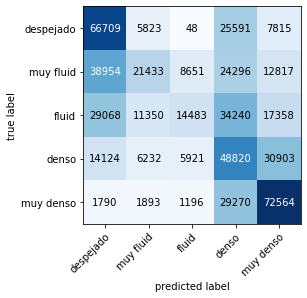

In [227]:
X_train, X_test, y_train, y_test = train_test_split(df_light_x, df_light_y, test_size=0.4, random_state=42)

clf =  DecisionTreeClassifier(criterion = 'entropy', max_depth= 8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# df_general_menor

In [ ]:
# Codificacion valores ordinales

categorias = ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

df_general_menor['<num camiones>']= codificar(df_general_menor,'<num camiones>', categorias)
df_general_menor['<Hist. Minuts trànsit>']= codificar(df_general_menor,'<Hist. Minuts trànsit>', categorias)
df_general_menor['<Hist. codeco sortida>']= codificar(df_general_menor,'<Hist. codeco sortida>', categorias)

#codificacion de valores nominales

df_general_menor["<Lloc d'entrada port>"] = le.fit_transform(df_general_menor["<Lloc d'entrada port>"])

df_general_menor_x= df_general_menor.drop("<Minuts trànsit>", axis=1)
df_general_menor_y= df_general_menor["<Minuts trànsit>"]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df_general_menor_x, df_general_menor_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof  =np.arange(3, 100)

param_grid = {'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4398222641295451 con una parametrización:  {'tree__criterion': 'gini', 'tree__max_depth': 8}


In [216]:
grid.cv_results_

{'mean_fit_time': array([1.14835029, 1.24888391, 1.32092586, 1.41243777, 1.48669171,
        1.45717492, 1.48700805, 1.53415895, 1.59412274, 1.66185369,
        1.71549077, 1.72456589, 1.70854053, 1.71034026, 1.72273169,
        1.75308824, 1.74343457, 1.72641721, 1.71324849, 1.73691649,
        1.72660513, 1.73373694, 1.75570121, 1.76816611, 1.78724823,
        1.77867708, 1.77883959, 1.79172945, 1.76998944, 1.75423274,
        1.7425858 , 1.70939593, 1.69533057, 1.7043551 , 1.7441885 ,
        1.76986661, 1.80672579, 1.74408112, 1.76357102, 1.75301757,
        1.7809648 , 1.82839389, 1.80444102, 1.80970054, 1.79227657,
        1.79555779, 1.78755789, 1.76685677, 1.75928822, 1.74070644,
        1.74727054, 1.74580112, 1.7537147 , 1.78943186, 1.76729383,
        1.76761198, 1.7588141 , 1.78310618, 1.79782019, 1.91399803,
        1.79156537, 1.80459743, 1.78613558, 1.80612621, 1.8449779 ,
        1.80764637, 1.76817117, 1.82139831, 1.69785748, 1.70425539,
        1.6982295 , 1.70285025,

Accuracy:  0.4399080528811445


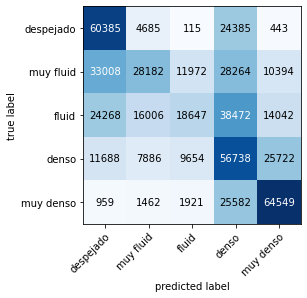

In [228]:
X_train, X_test, y_train, y_test = train_test_split(df_general_menor_x, df_general_menor_y, test_size=0.4, random_state=42)

clf =  DecisionTreeClassifier(criterion = 'gini', max_depth= 8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# df_light_menor

In [214]:
# Codificacion valores ordinales

categorias = ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

df_light_menor['<num camiones>']= codificar(df_light_menor,'<num camiones>', categorias)
df_light_menor['<Hist. Minuts trànsit>']= codificar(df_light_menor,'<Hist. Minuts trànsit>', categorias)
df_light_menor['<Hist. codeco sortida>']= codificar(df_light_menor,'<Hist. codeco sortida>', categorias)

#codificacion de valores nominales

df_light_menor["<Lloc d'entrada port>"] = le.fit_transform(df_light_menor["<Lloc d'entrada port>"])

df_light_menor_x= df_light_menor.drop("<Minuts trànsit>", axis=1)
df_light_menor_y= df_light_menor["<Minuts trànsit>"]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(df_light_menor_x, df_light_menor_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof  =np.arange(3, 100)

param_grid = {'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4383503954067815 con una parametrización:  {'tree__criterion': 'gini', 'tree__max_depth': 7}


In [218]:
grid.cv_results_

{'mean_fit_time': array([1.1068316 , 1.20040312, 1.28346472, 1.35622149, 1.41722593,
        1.46479297, 1.47795472, 1.53518653, 1.53177242, 1.58263302,
        1.59994326, 1.61299143, 1.62063146, 1.62564363, 1.61268578,
        1.65100079, 1.65666685, 1.64433737, 1.60710993, 1.64323831,
        1.68236356, 1.6885457 , 1.6798614 , 1.68918414, 1.67572436,
        1.66584764, 1.65238972, 1.64927192, 1.6442955 , 1.59783688,
        1.64194665, 1.64866018, 1.65115719, 1.64977756, 1.58726482,
        1.60217052, 1.65217886, 1.66656919, 1.66185942, 1.64616904,
        1.67029543, 1.66068611, 1.66464586, 1.65546227, 1.65666399,
        1.6408422 , 1.65057521, 1.63242607, 1.64311137, 1.64833922,
        1.6358737 , 1.64183855, 1.63202896, 1.65234165, 1.6676651 ,
        1.68689265, 1.70283036, 1.53859181, 1.48993359, 1.48652177,
        1.49416156, 1.47030883, 1.46245375, 1.45817142, 1.45727639,
        1.44266076, 1.44825625, 1.44156179, 1.44558077, 1.44900031,
        1.44000096, 1.44023314,

Accuracy:  0.4364478388040299


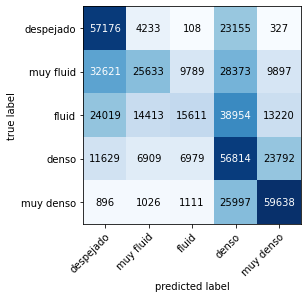

In [229]:
X_train, X_test, y_train, y_test = train_test_split(df_light_menor_x, df_light_menor_y, test_size=0.4, random_state=42)

clf =  DecisionTreeClassifier(criterion = 'gini', max_depth= 8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# Random forest 

# df_general

In [261]:
df_general_x= df_general.drop("<Minuts trànsit>", axis=1)
df_general_y= df_general["<Minuts trànsit>"]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(df_general_x, df_general_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', RandomForestClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof= np.arange(3, 15, 3)

est= np.arange(50, 151, 50)

param_grid = {'tree__n_estimators': est, 'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4230226541443515 con una parametrización:  {'tree__criterion': 'entropy', 'tree__max_depth': 12, 'tree__n_estimators': 150}


In [263]:
grid.cv_results_

{'mean_fit_time': array([ 9.91568108, 18.80791502, 27.774966  , 15.46607323, 29.76272554,
        44.08422775, 19.37372127, 37.89043293, 56.57962046, 22.50023546,
        44.10835457, 65.64935265,  9.83352017, 18.79382749, 27.47725415,
        15.29457369, 30.03857751, 44.04939861, 19.63763075, 38.04067874,
        56.48519263, 22.64669023, 43.64480066, 67.35046558]),
 'std_fit_time': array([0.06571988, 0.17274106, 0.2402327 , 0.23806149, 0.12740198,
        0.10616364, 0.09779611, 0.17817375, 0.22893246, 0.13836958,
        0.28069568, 0.30862957, 0.09373834, 0.08911456, 0.06331419,
        0.14322888, 0.68910601, 0.12209273, 0.0741529 , 0.12247749,
        0.16797055, 0.17026231, 0.30683186, 2.90944356]),
 'mean_score_time': array([0.70712972, 1.2455934 , 1.80257597, 0.91913729, 1.65896626,
        2.40218587, 1.15350189, 2.13169127, 3.11747684, 1.43435965,
        2.70201545, 3.97026176, 0.70312672, 1.23410773, 1.77165861,
        0.912356  , 1.64242115, 2.37424874, 1.14634972, 2.12

In [57]:
df_general_x= df_general.drop("<Minuts trànsit>", axis=1)
df_general_y= df_general["<Minuts trànsit>"]

Accuracy:  0.4239201087277669


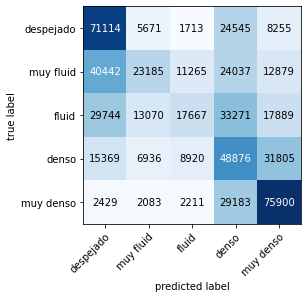

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_general_x, df_general_y, test_size=0.4, random_state=42)

clf =  RandomForestClassifier(criterion = 'entropy', max_depth= 12, n_estimators= 150)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# df_light

In [63]:
df_light_x= df_light.drop("<Minuts trànsit>", axis=1)
df_light_y= df_light["<Minuts trànsit>"]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(df_light_x, df_light_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', RandomForestClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof= np.arange(3, 15, 3)

est= np.arange(50, 151, 50)

param_grid = {'tree__n_estimators': est, 'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4224407604834076 con una parametrización:  {'tree__criterion': 'entropy', 'tree__max_depth': 12, 'tree__n_estimators': 100}


In [266]:
grid.cv_results_

{'mean_fit_time': array([ 9.15713272, 17.26285839, 25.58656287, 13.90503869, 27.4866684 ,
        40.67073646, 17.93654613, 35.07167239, 52.27670474, 20.75477328,
        40.44299664, 60.65120039,  9.22394247, 17.65814672, 25.95615306,
        14.21631989, 27.5406414 , 40.53336415, 17.66399279, 34.33730221,
        51.19585395, 20.57747831, 40.12502275, 59.63050027]),
 'std_fit_time': array([0.12854776, 0.09349573, 0.19993728, 0.09974486, 0.38846219,
        0.20101318, 0.10503355, 0.22998117, 0.26908508, 0.11712107,
        0.1944353 , 0.2564136 , 0.05953207, 0.14563035, 0.19412261,
        0.10711219, 0.35150479, 0.26277018, 0.14222165, 0.14634539,
        0.16018821, 0.12608339, 0.08593338, 0.27653166]),
 'mean_score_time': array([0.6720109 , 1.18543944, 1.69136019, 0.87227402, 1.57439818,
        2.30446687, 1.10403571, 2.04058981, 2.98317919, 1.37712488,
        2.59653745, 3.81023779, 0.6791894 , 1.18546848, 1.69489131,
        0.86149554, 1.57539907, 2.26043277, 1.07691622, 2.00

Accuracy:  0.42373209134421685


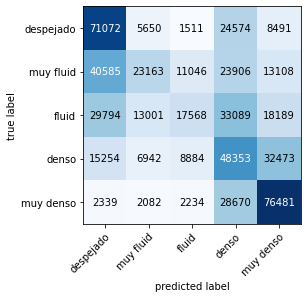

In [64]:
clf =  RandomForestClassifier(criterion = 'entropy', max_depth= 12, n_estimators= 100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# df_general_menor

In [65]:
df_general_menor_x= df_general_menor.drop("<Minuts trànsit>", axis=1)
df_general_menor_y= df_general_menor["<Minuts trànsit>"]


In [268]:
X_train, X_test, y_train, y_test = train_test_split(df_general_menor_x, df_general_menor_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', RandomForestClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof= np.arange(3, 15, 3)

est= np.arange(50, 151, 50)

param_grid = {'tree__n_estimators': est, 'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4397645083645566 con una parametrización:  {'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__n_estimators': 150}


In [269]:
grid.cv_results_

{'mean_fit_time': array([ 9.27122331, 17.77051306, 26.25143151, 14.26913314, 27.68327518,
        41.22874274, 17.88967161, 35.06179323, 52.00042515, 20.47288656,
        40.45654225, 59.26141577,  9.1573729 , 17.53518386, 26.37994895,
        14.41347904, 27.70665817, 41.2155592 , 17.91810956, 35.78363972,
        52.19290309, 20.66640158, 41.21561894, 61.55137095]),
 'std_fit_time': array([0.06955664, 0.09902543, 0.06365398, 0.06384331, 0.21760889,
        0.14230229, 0.1074744 , 0.08422133, 0.13481019, 0.06972628,
        0.89516274, 0.12461416, 0.04518483, 0.10527009, 0.91191509,
        0.11093656, 0.09692454, 0.15193838, 0.025429  , 0.76151941,
        0.19923365, 0.11127161, 1.21833078, 0.19233497]),
 'mean_score_time': array([0.64088526, 1.11601124, 1.59872599, 0.81521287, 1.46987195,
        2.12951713, 1.03442845, 1.92346625, 2.80469341, 1.2704062 ,
        2.37641406, 3.46714401, 0.63390226, 1.09808202, 1.57858143,
        0.80824103, 1.45590305, 2.10517855, 1.02691865, 1.89

Accuracy:  0.4200881353868413


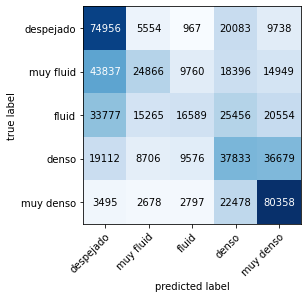

In [66]:
clf =  RandomForestClassifier(criterion = 'gini', max_depth= 9, n_estimators= 150)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()

# df_light_menor

In [67]:
df_light_menor_x= df_light_menor.drop("<Minuts trànsit>", axis=1)
df_light_menor_y= df_light_menor["<Minuts trànsit>"]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(df_light_menor_x, df_light_menor_y, test_size=0.4, random_state=42)

pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', RandomForestClassifier())])

cross_val_score(pipe,X_train,y_train,cv=5, scoring='accuracy', error_score='raise').mean()

prof= np.arange(3, 15, 3)

est= np.arange(50, 151, 50)

param_grid = {'tree__n_estimators': est, 'tree__criterion': ['gini','entropy'], 'tree__max_depth':prof}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)

print("best classifier: ", grid.best_score_, "con una parametrización: ",grid.best_params_)  

best classifier:  0.4381730040082331 con una parametrización:  {'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__n_estimators': 50}


In [272]:
grid.cv_results_

{'mean_fit_time': array([ 8.89128909, 16.91806078, 25.27732425, 13.48479495, 26.0132791 ,
        38.6753108 , 16.72212296, 32.74117608, 48.77950411, 19.22122383,
        37.60598006, 54.37399917,  8.59762821, 16.36015987, 24.17985373,
        13.02742748, 25.23351808, 38.69937892, 16.33375292, 31.81446967,
        47.4448534 , 18.74709382, 36.80339694, 54.68296571]),
 'std_fit_time': array([0.07556886, 0.10275066, 0.48891479, 0.05642438, 0.14927953,
        0.24481195, 0.02065019, 0.13579686, 0.10838787, 0.13796125,
        0.1348135 , 0.33012748, 0.07226762, 0.09126645, 0.12420295,
        0.03387905, 0.15435446, 2.72774108, 0.09833784, 0.14971644,
        0.09774529, 0.06250252, 0.21554602, 0.11955287]),
 'mean_score_time': array([0.6091507 , 1.07511382, 1.53969154, 0.77951035, 1.41422577,
        2.03802404, 0.99694138, 1.84645867, 2.70255728, 1.22253714,
        2.30244594, 3.31334863, 0.59241247, 1.03861656, 1.49540882,
        0.74860225, 1.35896182, 1.97553573, 0.96601787, 1.78

Accuracy:  0.4189313808175712


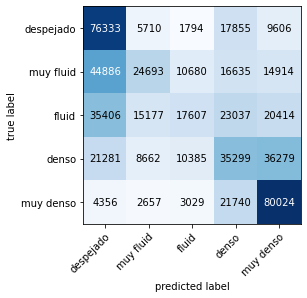

In [68]:
clf =  RandomForestClassifier(criterion = 'gini', max_depth= 9, n_estimators= 50)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels= ["despejado", "muy fluid", "fluid", "denso", "muy denso"])

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

class_names= ["despejado", "muy fluid", "fluid", "denso", "muy denso"]

fig, ax = plot_confusion_matrix(conf_mat=cm,
                               class_names=class_names)
plt.show()